In [62]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [63]:
df = pd.read_csv('framingham_heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [64]:
df = df.dropna()
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [65]:
x = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [66]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x , y, test_size = 0.2, random_state = 42)
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(2924, 15) (732, 15) (2924,) (732,)


In [67]:
clf = LogisticRegression()
clf.fit(x_treino, y_treino)

c:\Users\marce\OneDrive\Documentos\Varos\DEV_Christian\ml_\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
coef_df = pd.DataFrame(clf.coef_[0], index = x.columns, columns = ['Coeficientes'])
coef_df

,Coeficientes
male,0.532857
age,0.035787
education,-0.147802
currentSmoker,-0.112684
cigsPerDay,0.018085
BPMeds,0.206005
prevalentStroke,0.076376
prevalentHyp,0.899402
diabetes,0.240637
totChol,-0.000514


In [69]:
score_treinamento = clf.score(x_treino, y_treino)
score_teste = clf.score(x_teste, y_teste)
print(score_treinamento, score_teste)

0.8543091655266758 0.8346994535519126


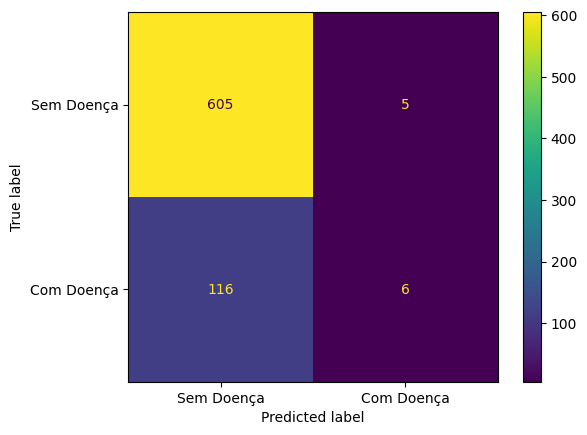

In [70]:
y_pred = clf.predict(x_teste)
cm = confusion_matrix(y_teste, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

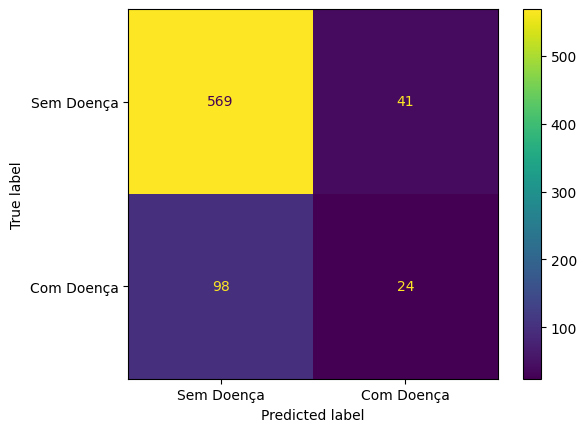

In [71]:
# Passo 1: Pegar as probabilidades da classe positiva
y_probs = clf.predict_proba(x_teste)[:, 1]

# Passo 2: Definir threshold (exemplo: 0.3)
threshold = 0.3
y_pred2 = (y_probs >= threshold).astype(int)

# Passo 3: Matriz de confusão com novo threshold
cm = confusion_matrix(y_teste, y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem Doença', 'Com Doença'])
display.plot();

In [72]:
clf_report = classification_report(y_teste, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.55      0.05      0.09       122

    accuracy                           0.83       732
   macro avg       0.69      0.52      0.50       732
weighted avg       0.79      0.83      0.77       732



In [73]:
accuracy = accuracy_score(y_teste, y_pred) # O conjunto de dados está desequilibrado, e o FN custa mais caro.
print(accuracy)
precision = precision_score(y_teste, y_pred) # FP é mais caro que o FN.
print(precision)
recall = recall_score(y_teste, y_pred) # FN é mais caro que o FP, ideal para ser utilizado
print(recall)

0.8346994535519126
0.5454545454545454
0.04918032786885246


In [74]:
recall = recall_score(y_teste, y_pred2)
print(recall)
f1 = f1_score(y_teste, y_pred2)
print(f1)

0.19672131147540983
0.25668449197860965
